Make sure you use GPU for running this notebook.

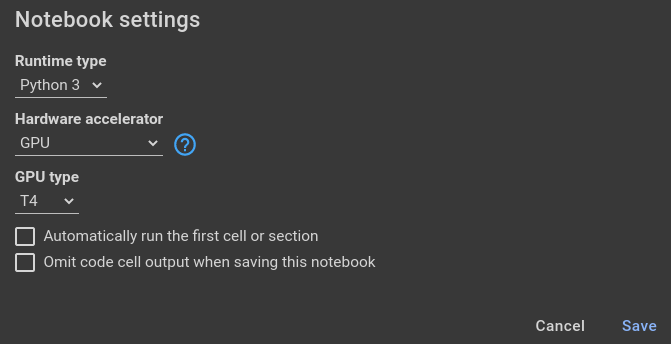

Let's install the packages requirement

In [ ]:
!pip install bitsandbytes==0.39.1
!pip install transformers==4.31.0
!pip install git+https://github.com/huggingface/peft.git
!pip install accelerate==0.20.3
!pip install einops==0.6.1 scipy sentencepiece datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.5 MB/s eta 0:00:00
  Cloning https://github.com/huggingface/peft.git to /tmp/pip-req-build-k5bih9tl
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/peft.git /tmp/pip-req-build-k5bih9tl
  Resolved https://github.com/huggingface/peft.git to commit b15c18593975d345b3857faba4860c0d68c5d287
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 4.9 MB/s eta 0:00:00
  Created wheel for peft: filename=peft-0.5.0.dev0-py3-none-any.whl size=73137 s

Now, it will automatically download model from Huggingface. The size is about 27 GB. But don't worry, because it doesn't consume your internet quota. Just be patient about 10 minutes.

Since this model was based on Llama 2, then we will use LlamaTokenizer

In [ ]:
import torch
from transformers import AutoTokenizer, AutoConfig, AutoModelForCausalLM, BitsAndBytesConfig, LlamaTokenizer
from peft import PeftModel, PeftConfig

model_id = "Ichsan2895/Merak-7B-v1"
config = AutoConfig.from_pretrained(model_id)
BNB_CONFIG = BitsAndBytesConfig(load_in_4bit=True,
                                bnb_4bit_compute_dtype=torch.bfloat16,
                                bnb_4bit_use_double_quant=True,
                                bnb_4bit_quant_type="nf4",
    )


model = AutoModelForCausalLM.from_pretrained(model_id,
                                             device_map="auto",
                                             quantization_config=BNB_CONFIG,
                                             trust_remote_code=True)

tokenizer = LlamaTokenizer.from_pretrained(model_id)

model.eval()


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda118.so
CUDA_SETUP: WARNING! libcudart.so not found in any environmental path. Searching in backup paths...
CUDA SETUP: CUDA runtime path found: /usr/local/cuda/lib64/libcudart.so
CUDA SETUP: Highest compute capability among GPUs detected: 7.5
CUDA SETUP: Detected CUDA version 118
CUDA SETUP: Loading binary /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda118.so...


/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: /usr/lib64-nvidia did not contain ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] as expected! Searching further paths...
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/sys/fs/cgroup/memory.events /var/colab/cgroup/jupyter-children/memory.events')}
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('8013'), PosixPath('//172.28.0.1'), PosixPath('http')}
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('//colab.research.google.com/tun/m/cc483011

Loading checkpoint shards:   0%|          | 0/6 [00:00<?, ?it/s]

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(32000, 4096, padding_idx=0)
    (layers): ModuleList(
      (0-31): 32 x LlamaDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (v_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (o_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear4bit(in_features=4096, out_features=11008, bias=False)
          (up_proj): Linear4bit(in_features=4096, out_features=11008, bias=False)
          (down_proj): Linear4bit(in_features=11008, out_features=4096, bias=False)
          (act_fn): SiLUActivation()
        )
        (input_layernorm): LlamaRMSNorm()
        (post_attention_layernorm): LlamaRMSNorm()
      )


I added BNB_CONFIG that differentiate this notebook with DEMO_MERAK-7B-v1. BNB_CONFIG will reduce VRAM consumption. But, sometimes the answer was not good as without BNB_CONFIG. Keep playing with it for your curiosity.

Now, we add function for generate response, so it will be called when we want ask question to this AI

In [ ]:
def generate_response(question: str) -> str:
  prompt = f"<|prompt|>{question}<|answer|>".strip()

  encoding = tokenizer(prompt, return_tensors='pt').to("cuda")
  with torch.inference_mode():
    outputs = model.generate(input_ids=encoding.input_ids,
                             attention_mask=encoding.attention_mask,
                             eos_token_id=tokenizer.pad_token_id,
                             do_sample=False,
                             num_beams=2,
                             temperature=0.3,
                             repetition_penalty=1.2,
                             max_length=200)

    response = tokenizer.decode(outputs[0], skip_special_tokes=True)

    assistant_start = "<|answer|>"
    response_start = response.find(assistant_start)
    return response[response_start + len(assistant_start) :].strip()

Let's play with some questions. It this case, it doesn't use langchain so it don't be interactive chat. Just like Q & A. I'm planning to learn langchain, so it will be more interactive as it remembers previous answer to answer next question.

In [ ]:
prompt = "Jelaskan mengapa air menjadi penting bagi kehidupan manusia?"
print(generate_response(prompt))

Air merupakan suatu unsur yang sangat penting dalam kehidupan manusia.</s>


In [ ]:
prompt = "Saya membeli 10 apel, kemudian saya memakan 4 apel. Berapa apel yang tersisa?"
print(generate_response(prompt))

Berapa apel yang tersisa adalah 6 apel.</s>


In [ ]:
prompt = "Kapan kota Nagasaki dijatuhi bom atom?"
print(generate_response(prompt))

Nagasaki dijatuhi bom atom oleh Amerika Serikat pada 9 Agustus 1945.</s>


That is it, let's check the VRAM usage

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!nvidia-smi

Mon Jul 24 13:34:52 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   81C    P0    71W /  70W |   5443MiB / 15360MiB |    100%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------